In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz this week.
    - Identify vector fields.
    - Compute a line integral.
  - Homework 11 due **Tuesday**.
  - Final Exam
    - Tuesday, Dec 17.
    
    

# One-minute Review

Compute the following line integral 
 $$\int_C (x-y)\,dx + xy\,dy$$ where $C$ is the clockwise section of the circle $x^2 + y^2 = 1$ from $(1,0)$ to $(0,1)$. 

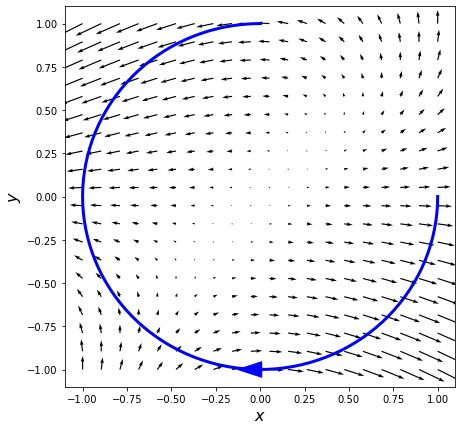

In [61]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x-y,x*y);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-1,-.001,0,width=.03,color='b')
plt.plot(cos(t*3*pi/2),-sin(t*3*pi/2),'b',lw=3);

## Work example

A wagon 5 m away is pulled by a rope from a height 1 m above it with a force of 7 N. How much work is done pulling it the full distance?
<!--![Picture of wagon pulled by rope](wagon.png) -->

In [56]:
@interact(xpos=(0.,5.))
def _(xpos=0):
    fig = plt.figure(figsize = (7.5,3))
    ax = fig.gca()
    ax.plot([0+xpos,5],[0,1],'k')
    ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
    for xx in (-5/3,-1/3):
        ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='k',alpha=1))
    ax.set_ylim([-1,2])
    ax.set_xlim([-2.5,5])
    ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
    for xi in np.arange(0,xpos,1/2):
        ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);

interactive(children=(FloatSlider(value=0.0, description='xpos', max=5.0), Output()), _dom_classes=('widget-in…

# Lecture 20

  - Objectives
    - Fundamental Theorem of Line Integrals
      - Relation to path-independence
      - Why "conservative"?
    - Green's Theorem (if time)
  - Resources
    - Content
      - Stewart: §16.4
      - New Strang:  
        - [§6.3](https://openstax.org/books/calculus-volume-3/pages/6-3-conservative-vector-fields) 
        - [§6.4](https://openstax.org/books/calculus-volume-3/pages/6-4-greens-theorem)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L20.ipynb) via JupyterHub
    - Practice
      - Mooculus: [Line Integrals](https://ximera.osu.edu/mooculus/calculus3/lineIntegrals/digInLineIntegrals) [Green's Theorem](https://ximera.osu.edu/mooculus/calculus3/greensTheorem/titlePage)
    - Extras 
      - CalcBLUE: [Path Independence](https://www.youtube.com/watch?v=Wgd8RA-pagQ&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=23) 

# A line integral through a conservative vector field

What happens when we combine the last two topics: line integrals and conservative vector fields?

$$\int_C \nabla f \cdot d\vec r $$

where $C$ is a piecewise smooth, oriented curve parametrized by $\vec r(t)$ for $a\leq t \leq b$ and $f$ is a differentiable function. 


$$ = \int_a^b \nabla f(\vec r(t)) \cdot \vec r'(t)\, dt $$

$$ = \int_a^b \left( \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt} \right)\, dt $$

$$ = \int_a^b (f\circ \vec r)'(t)\, dt $$

$$ = f(\vec r(b)) - f(\vec r(a))$$

# The Fundamental Theorem of Line integrals

Let $C$ be a piecewise-smooth, oriented curve from point $(x_1,y_1)$ to point $(x_2,y_2)$ and $\vec F$ a continuous conservative vector field with poential $f$. (That is, $\nabla f = \vec F$.)  Then, $$\int_C \vec F\cdot d\vec r = f(x_2,y_2) - f(x_1,y_1).$$

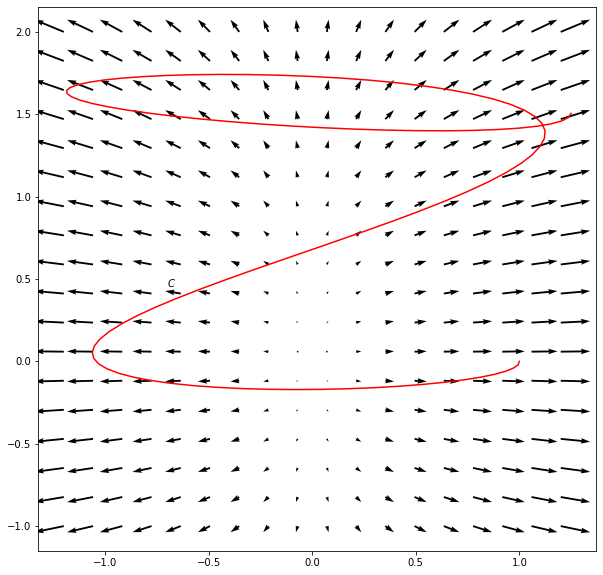

In [65]:
r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
t = np.linspace(0,1,100)
plt.plot(*r(t),'-r')
plt.text(-.7,.45,"$C$");
u = np.linspace(-1.2,1.2,18) 
v = np.linspace(-1,2,18)
x,y = np.meshgrid(u,v)
plt.quiver(x,y,2*x,y/2);


## Example

Compute $\int_C \vec F\cdot d\vec r$ where $C$ is the curve $\langle (1+t/4)\cos(4\pi t),2t - \frac12\sin(8 t) \rangle$ for $t\in [0,1]$ and $$\vec F(x,y) = \left\langle 2x,\frac{y}{2} \right\rangle.$$

In [74]:
r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
f = lambda x,y: x**2 + y**2/4
t = np.linspace(0,1,100)

@interact(angle=(-108,66,6),s=(0.,1,.05),)
def _(angle=-24,vangle=(0,90,6),s=0,
     r=fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])),
     r2=fixed(lambda t: np.array([(1-t)+5/4 * t,(t)*(2 - sin(8)/2)])),
     f=fixed(lambda x,y: x**2 + y**2/4),
     t=fixed(np.linspace(0,1,100))):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121,projection='3d')
    u = np.linspace(-1.2,1.25,100) 
    v = np.linspace(-1,2,100) 
    w = np.linspace(0,1,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    A = np.array([1,0])
    B = np.array([5/4,2-sin(8)])
    ax.plot_surface(*((1-s)*r(w) + s*r2(w)),z*f(*((1-s)*r(w) + s*r2(w))),color='r')
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)


    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax2= fig.add_subplot(122)

    ax2.plot(*r(t),'-r',alpha=.4)
    ax2.plot(*((1-s)*r(t) + s*r2(t)),'-r')
    ax2.text(-.7,.45,"$C$");
    u = np.linspace(-1.2,1.2,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    plt.quiver(x,y,2*x,y/2);

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

## Theorem

The following statements are equivalent regarding a continuous vector field $\vec F$.

  - $F$ is conservative.

  - $\oint_C \vec F\cdot d\vec r = 0$ on every closed curve $C$.

  - $\int_C \vec F\cdot d\vec r$ depends only on the endpoints of $C$, i.e., is path-independent.

## Examples

  1. Compute $\int_C x\,dx + y\,dy$ along the parabola $y = \frac49 x^2$ from $(0,0)$ to $(3,4)$.

  2. A 160-lb man carries a 25-lb can of paint up a helical staircase that encircles a silo with a radius of 20-ft. If the silo is 90 ft high and the man makes exactly three complete revolutions climbing to the top, how much work is done by the man against gravity? 

  3. Suppose there is a hole in the can of paint in the exercise above and 9 lbs of paint leaks steadily out of the can during the man's ascent. How much work is done?	 
 

In [79]:
185*90 - 9*45

16245

## Why "conservative"?

In physics, we say a force field $\vec F$ has potential $f$ if $\vec F = -\nabla f$. (Note: this does not change which fields are conservative; it is just a sign convention.)

Let $\vec r(t) $ for $t \in [a,b]$ be the position of a particle with mass $m$ moving in this force field. We compute the work done by the force in two ways. 

$$ \int_C \vec F\cdot d\vec r = \int_a^b \vec F(\vec r(t))\cdot \vec r'(t)\,dt $$

using $\vec F = m \vec a = m \vec r''(t) $,

$$ = \int_a^b m(\vec r''(t))\cdot \vec r'(t)\,dt $$

Here's the key step: 

$$ = \int_a^b \frac{d}{dt}\left( \frac 12 m\, (\vec r'(t))\cdot \vec r'(t) \right)\,dt $$

$$= \frac 12 m\, \vec r'(b)\cdot \vec r'(b) - \frac 12\, m \vec r'(a)\cdot \vec r'(a) $$

$$= \frac12m |\vec v(b)|^2 - \frac12 m|\vec v(a)|^2 $$

A second way:

$$ \int_C \vec F\cdot d\vec r = \int_C -\nabla f\cdot d\vec r $$

using FTLI,

$$ = -f(\vec r(b)) + f(\vec r(a)) $$

Putting these together we get...

#### Conservation of Energy

$$ f(\vec r(a)) + \frac12m|\vec v(a)|^2 =  f(\vec r(b)) + \frac12m|\vec v(b)|^2 $$

## Preview of next time

Let $\mathcal{R}$ be the rectangular region $[a,b]\times [c,d]$. Let $C$ be its counter-clockwise oriented boundary. Compute 

$$\oint_C x\,\vec j\cdot d\vec r$$

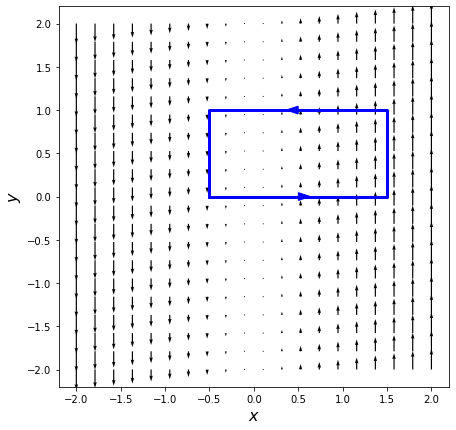

In [87]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot([-1/2,3/2,3/2,-1/2,-1/2],[0,0,1,1,0],'b',lw=3);
plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);